# SIKKIM

In [534]:
import pandas as pd

# Load the datasets for Sikkim
df_sk_enrolment = pd.read_csv('/content/Sikkim Enrolment Dataset.csv')
df_sk_demographic = pd.read_csv('/content/Sikkim Demographic Dataset.csv')
df_sk_biometric = pd.read_csv('/content/Sikkim Biometric Dataset.csv')

print("Sikkim Enrolment Dataset:")
print(df_sk_enrolment.head())
print(df_sk_enrolment.info())
print(df_sk_enrolment.describe())

print("\nSikkim Demographic Dataset:")
print(df_sk_demographic.head())
print(df_sk_demographic.info())
print(df_sk_demographic.describe())

# Standardize the 'state' column in df_sk_biometric
df_sk_biometric['state'] = df_sk_biometric['state'].str.title()

print("\nSikkim Biometric Dataset:")
print(df_sk_biometric.head())
print(df_sk_biometric.info())
print(df_sk_biometric.describe())

Sikkim Enrolment Dataset:
         date   state      district  pincode  age_0_5  age_5_17  \
0  03-09-2025  Sikkim          East   737101        0         1   
1  03-09-2025  Sikkim          East   737107        1         0   
2  03-09-2025  Sikkim         South   737134        0         1   
3  03-09-2025  Sikkim  South Sikkim   737126        0         3   
4  03-09-2025  Sikkim          West   737121        2         2   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1193 non-null   object
 1   state           1193 non-null   object
 2   district        1193 non-null   object
 3   pincode         1193 non-null   int64 
 4   age_0_5         1193 non-null   int64 
 5   age_5_17        1193 non-null   

In [535]:
df_sk_enrolment['date'] = pd.to_datetime(df_sk_enrolment['date'], format='%d-%m-%Y')
df_sk_demographic['date'] = pd.to_datetime(df_sk_demographic['date'], format='%d-%m-%Y')
df_sk_biometric['date'] = pd.to_datetime(df_sk_biometric['date'], format='%d-%m-%Y')

# Perform outer merges to combine the datasets
merged_sk_df_temp = pd.merge(df_sk_enrolment, df_sk_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_sk_merged = pd.merge(merged_sk_df_temp, df_sk_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_sk_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_sk_merged[numeric_cols] = df_sk_merged[numeric_cols].fillna(0)

print("Data types after conversion for df_sk_enrolment:")
print(df_sk_enrolment.info())
print("\nData types after conversion for df_sk_demographic:")
print(df_sk_demographic.info())
print("\nData types after conversion for df_sk_biometric:")
print(df_sk_biometric.info())
df_sk = df_sk_merged[df_sk_merged['state'] == 'Sikkim'].copy()
df_sk['year'] = df_sk['date'].dt.year
df_sk['month'] = df_sk['date'].dt.month

print("Shape of df_sk:", df_sk.shape)
print("\nFirst 5 rows of df_sk with new 'year' and 'month' columns:")
print(df_sk.head())

Data types after conversion for df_sk_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1193 non-null   datetime64[ns]
 1   state           1193 non-null   object        
 2   district        1193 non-null   object        
 3   pincode         1193 non-null   int64         
 4   age_0_5         1193 non-null   int64         
 5   age_5_17        1193 non-null   int64         
 6   age_18_greater  1193 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 65.4+ KB
None

Data types after conversion for df_sk_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3796 non-null   dateti

In [536]:
import numpy as np

# Ensure df_sk_merged is correctly prepared before proceeding
# (Assuming df_sk_enrolment, df_sk_demographic, df_sk_biometric are loaded and dates converted)
merged_sk_df_temp = pd.merge(df_sk_enrolment, df_sk_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_sk_merged = pd.merge(merged_sk_df_temp, df_sk_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols_sk = df_sk_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_sk_merged[numeric_cols_sk] = df_sk_merged[numeric_cols_sk].fillna(0)

# Filter for Sikkim state and extract year/month
df_sk = df_sk_merged[df_sk_merged['state'] == 'Sikkim'].copy()
df_sk['year'] = df_sk['date'].dt.year
df_sk['month'] = df_sk['date'].dt.month

In [537]:
# Define age columns
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Aggregate data by year, month, state, and district
df_sk_agg = df_sk.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

In [538]:
import numpy as np

# 1. Create 'totalenrolments' column
df_sk_agg['totalenrolments'] = df_sk_agg['age_0_5'] + df_sk_agg['age_5_17'] + df_sk_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_sk_agg['childenrolments'] = df_sk_agg['age_0_5'] + df_sk_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_sk_agg['totaldemoupdates'] = df_sk_agg['demo_age_5_17'] + df_sk_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_sk_agg['totalbioupdates'] = df_sk_agg['bio_age_5_17'] + df_sk_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_sk_agg['CES'] = np.where(
    df_sk_agg['totalenrolments'] == 0,
    0,
    df_sk_agg['childenrolments'] / df_sk_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_sk_agg['DUR'] = np.where(
    df_sk_agg['totalenrolments'] == 0,
    0,
    df_sk_agg['totaldemoupdates'] / df_sk_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_sk_agg['BUR'] = np.where(
    df_sk_agg['totalenrolments'] == 0,
    0,
    df_sk_agg['totalbioupdates'] / df_sk_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_sk_agg) with new metrics head:")
print(df_sk_agg.head())

Aggregated DataFrame (df_sk_agg) with new metrics head:
   year  month   state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Sikkim          East      0.0       0.0             0.0   
1  2025      3  Sikkim   East Sikkim      0.0       0.0             0.0   
2  2025      3  Sikkim         North      0.0       0.0             0.0   
3  2025      3  Sikkim  North Sikkim      0.0       0.0             0.0   
4  2025      3  Sikkim         South      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0           67.0        1290.0         419.0        583.0              0.0   
1           85.0         778.0         401.0        231.0              0.0   
2            0.0           0.0          22.0         28.0              0.0   
3            0.0           0.0          60.0         35.0              0.0   
4           17.0         612.0         205.0        430.0              0.0   

   childenrolments  tota

In [539]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_sk_agg['Enorm'] = df_sk_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_sk_agg['Dnorm'] = df_sk_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_sk_agg['Bnorm'] = df_sk_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_sk_agg['stdnorm'] = (df_sk_agg['Enorm'] + df_sk_agg['Dnorm'] + df_sk_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_sk_agg['ALBI'] = 1 - df_sk_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_sk_agg['ALBI'] = df_sk_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_sk_agg) with normalized metrics and ALBI head:")
print(df_sk_agg.head())

Aggregated DataFrame (df_sk_agg) with normalized metrics and ALBI head:
   year  month   state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Sikkim          East      0.0       0.0             0.0   
1  2025      3  Sikkim   East Sikkim      0.0       0.0             0.0   
2  2025      3  Sikkim         North      0.0       0.0             0.0   
3  2025      3  Sikkim  North Sikkim      0.0       0.0             0.0   
4  2025      3  Sikkim         South      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0           67.0        1290.0         419.0  ...            1357.0   
1           85.0         778.0         401.0  ...             863.0   
2            0.0           0.0          22.0  ...               0.0   
3            0.0           0.0          60.0  ...               0.0   
4           17.0         612.0         205.0  ...             629.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm

In [540]:
df_sk_agg['Enormrisk'] = 1 - df_sk_agg['Enorm']
df_sk_agg['CESrisknorm'] = 1 - df_sk_agg['CES']
df_sk_agg['DURrisknorm'] = 1 - df_sk_agg['DUR']
df_sk_agg['BURrisknorm'] = 1 - df_sk_agg['BUR']
df_sk_agg['ALBIrisknorm'] = 1 - df_sk_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_sk_agg['riskscore'] = (
    df_sk_agg['Enormrisk'] +
    df_sk_agg['CESrisknorm'] +
    df_sk_agg['DURrisknorm'] +
    df_sk_agg['BURrisknorm'] +
    df_sk_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_sk_agg) with risk components and riskscore head:")
print(df_sk_agg.head())

Aggregated DataFrame (df_sk_agg) with risk components and riskscore head:
   year  month   state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Sikkim          East      0.0       0.0             0.0   
1  2025      3  Sikkim   East Sikkim      0.0       0.0             0.0   
2  2025      3  Sikkim         North      0.0       0.0             0.0   
3  2025      3  Sikkim  North Sikkim      0.0       0.0             0.0   
4  2025      3  Sikkim         South      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0           67.0        1290.0         419.0  ...  0.876615  0.793021   
1           85.0         778.0         401.0  ...  0.557494  0.499603   
2            0.0           0.0          22.0  ...  0.000000  0.038065   
3            0.0           0.0          60.0  ...  0.000000  0.073751   
4           17.0         612.0         205.0  ...  0.406331  0.501983   

    stdnorm      ALBI  Enormrisk  CE

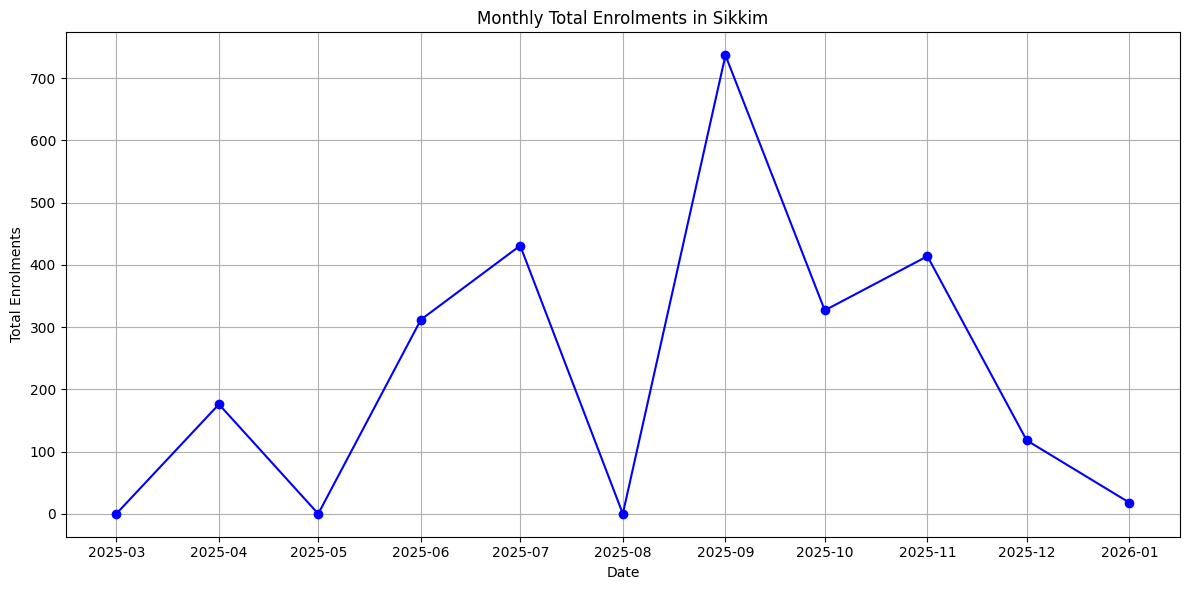

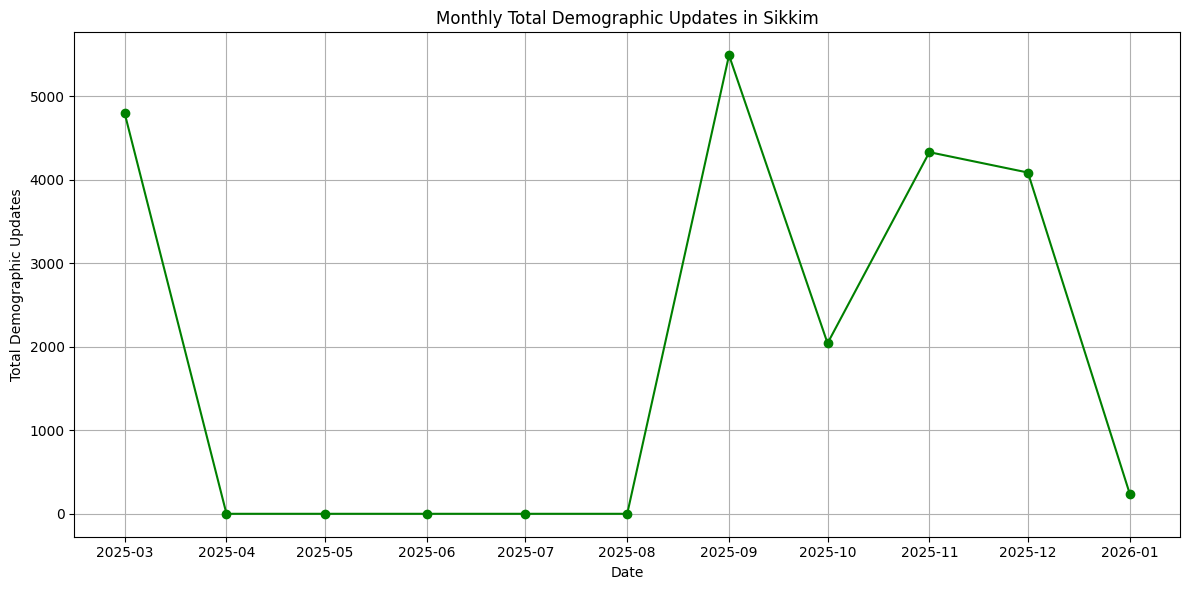

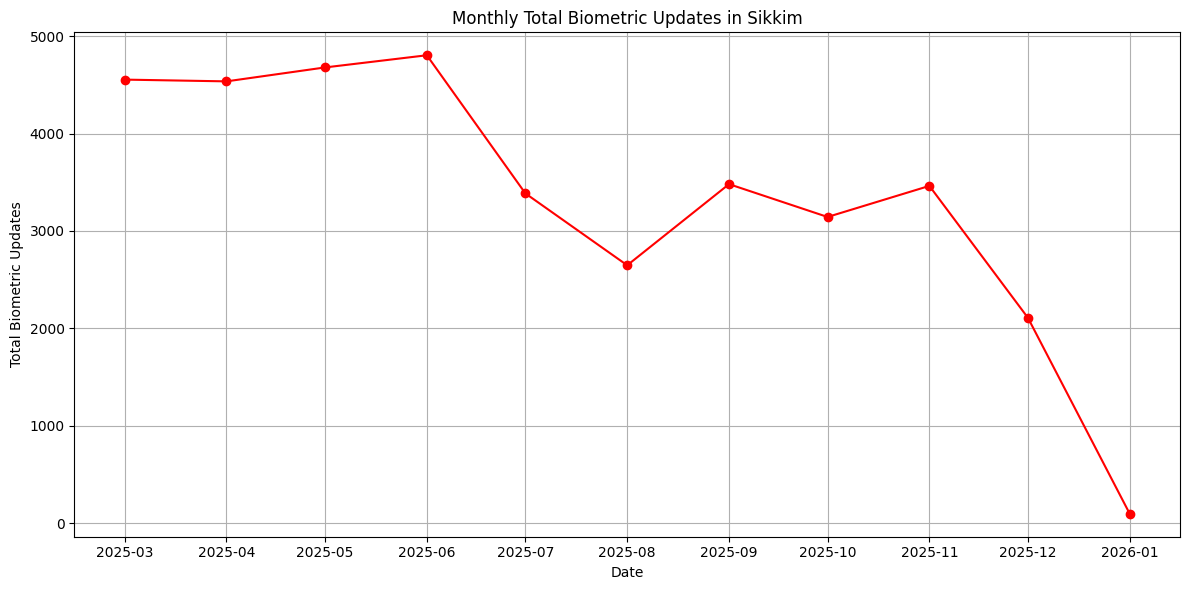

Monthly trend plots generated successfully.


In [541]:
import matplotlib.pyplot as plt

df_sk_monthly_trends = df_sk_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_sk_monthly_trends['date'] = pd.to_datetime(df_sk_monthly_trends['year'].astype(str) + '-' + df_sk_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_sk_monthly_trends = df_sk_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_sk_monthly_trends['date'], df_sk_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Sikkim')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_sk_monthly_trends['date'], df_sk_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Sikkim')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_sk_monthly_trends['date'], df_sk_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Sikkim')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

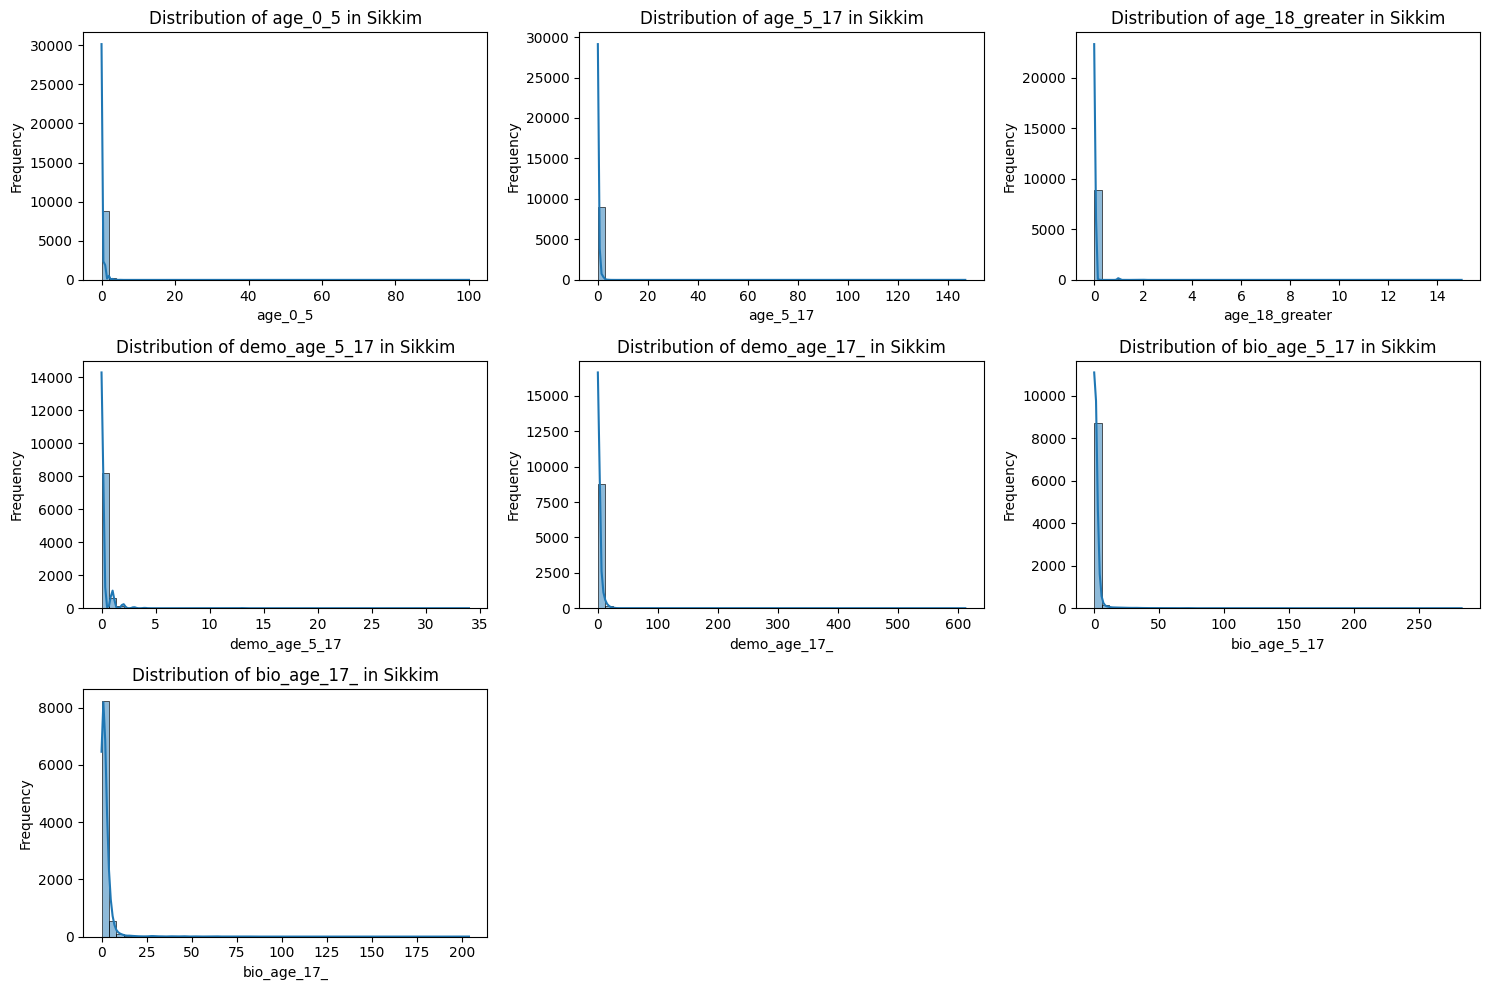

In [542]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_sk_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Sikkim')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

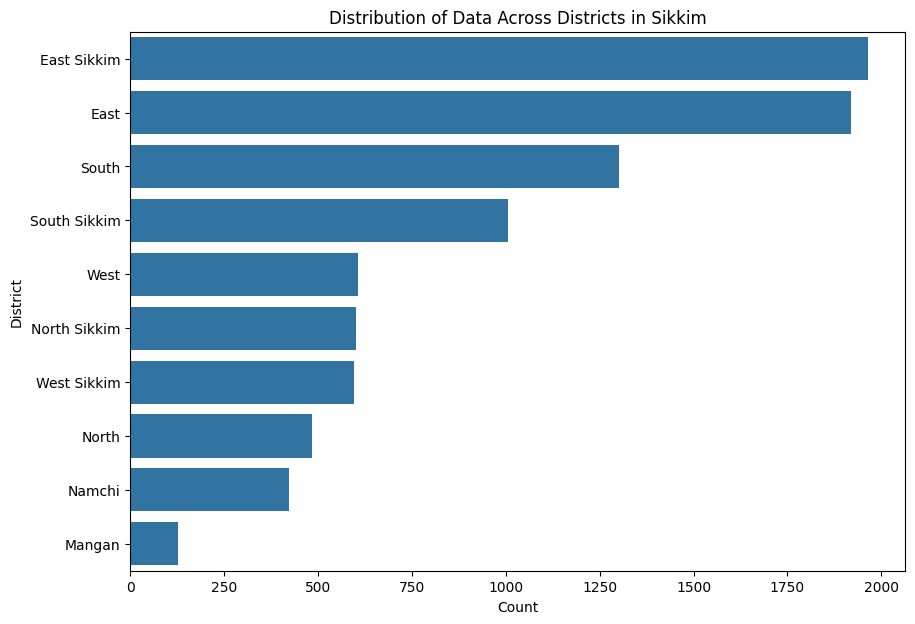

Histograms for numerical age-related columns and count plot for 'district' displayed for Sikkim.


In [543]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_sk_merged, y='district', order=df_sk_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Sikkim')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Sikkim.")

**Bivariate and Trivariate Analysis**

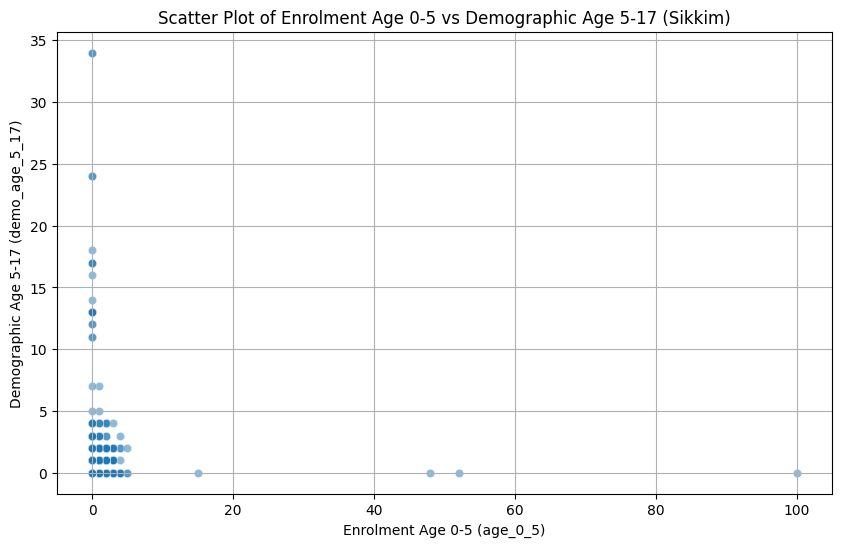

In [544]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sk_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Sikkim)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

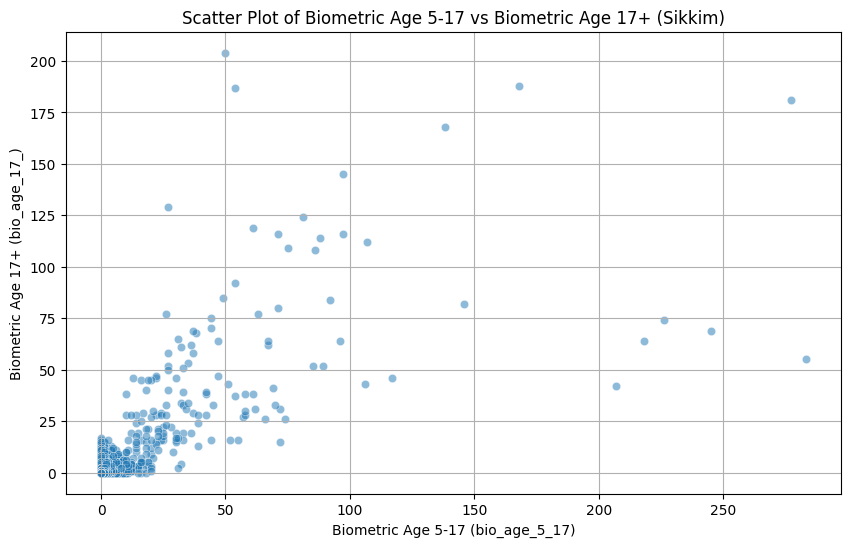

In [545]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sk_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Sikkim)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

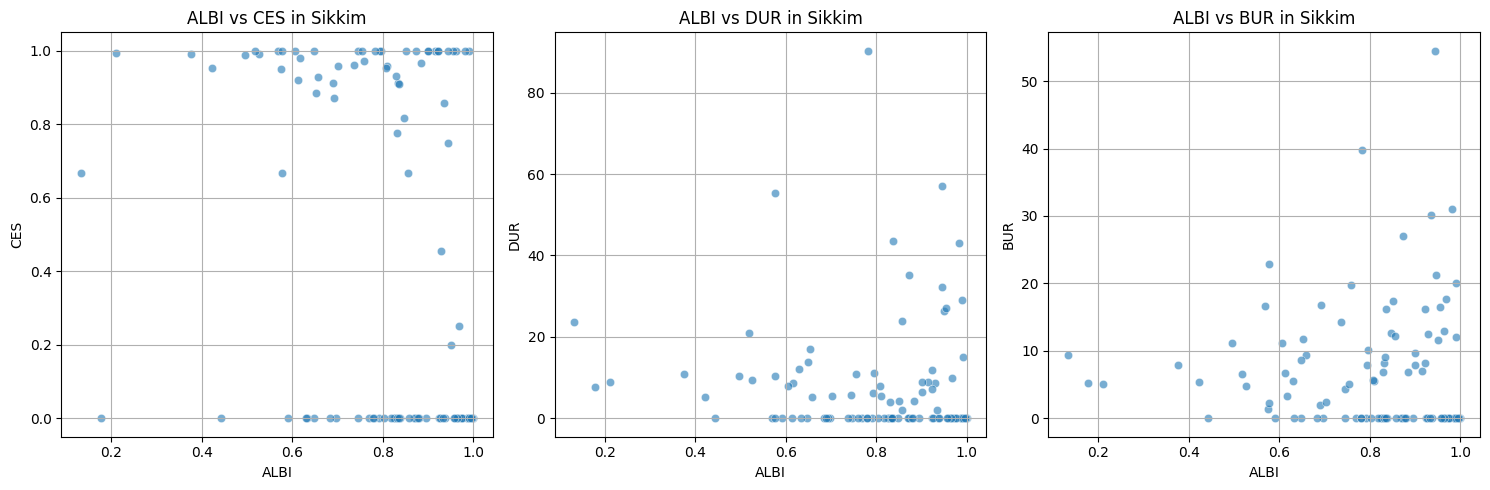

In [546]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_sk_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Sikkim')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

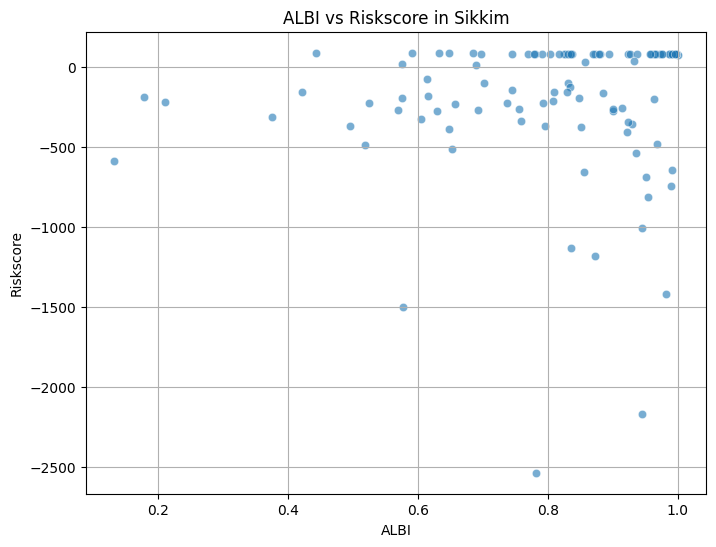

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Sikkim.


In [547]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sk_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Sikkim')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Sikkim.")

Correlation Matrix for Sikkim:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.934353        0.779756       0.017473   
age_5_17        0.934353  1.000000        0.832761       0.007675   
age_18_greater  0.779756  0.832761        1.000000       0.000360   
demo_age_5_17   0.017473  0.007675        0.000360       1.000000   
demo_age_17_    0.015457  0.008513       -0.001034       0.794825   
bio_age_5_17    0.079647  0.065768        0.102466       0.504968   
bio_age_17_     0.049962  0.043317        0.063713       0.351823   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.015457      0.079647     0.049962  
age_5_17            0.008513      0.065768     0.043317  
age_18_greater     -0.001034      0.102466     0.063713  
demo_age_5_17       0.794825      0.504968     0.351823  
demo_age_17_        1.000000      0.451223     0.464182  
bio_age_5_17        0.451223      1.000000     0.730824  
bio_age_17

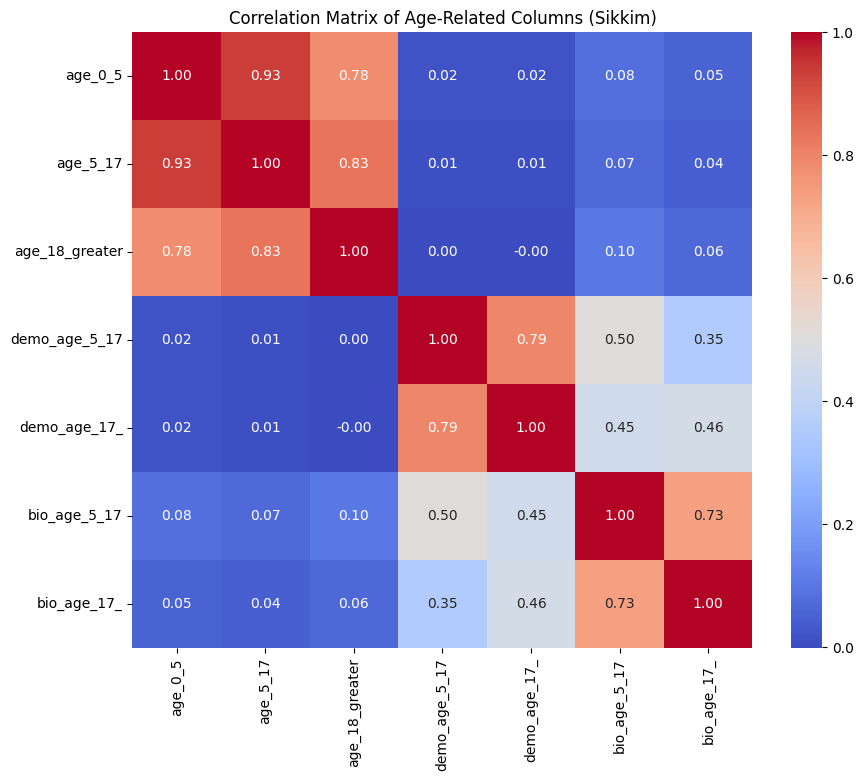

In [548]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_sk = df_sk_merged[numerical_age_cols].corr()

print("Correlation Matrix for Sikkim:")
print(correlation_matrix_sk)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sk, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Sikkim)')
plt.show()

In [549]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_sk_district_mean = df_sk_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Sikkim:")
print(df_sk_district_mean.head())
print(df_sk_district_mean.info())
df_sk_district_mean['total_avg_age'] = df_sk_district_mean[age_cols_to_group].sum(axis=1)

print("District-wise average age-related data with total average age:")
print(df_sk_district_mean.head())
print(df_sk_district_mean.info())
df_sk_district_mean_top10 = df_sk_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Sikkim:")
print(df_sk_district_mean_top10[['district', 'total_avg_age']])

District-wise average age-related data for Sikkim:
      district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0         East  0.133854  0.098958        0.001563       0.181771   
1  East Sikkim  0.103817  0.084987        0.015267       0.163359   
2       Mangan  0.000000  0.015748        0.015748       0.007874   
3       Namchi  0.007109  0.016588        0.037915       0.021327   
4        North  0.080745  0.028986        0.000000       0.078675   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      2.898438      1.605729     3.032292  
1      1.665140      1.795420     1.745038  
2      0.795276      0.047244     0.866142  
3      0.928910      0.037915     1.073460  
4      0.942029      0.505176     1.387164  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        10 non-null     object 
 1   age_0_5         10 non-

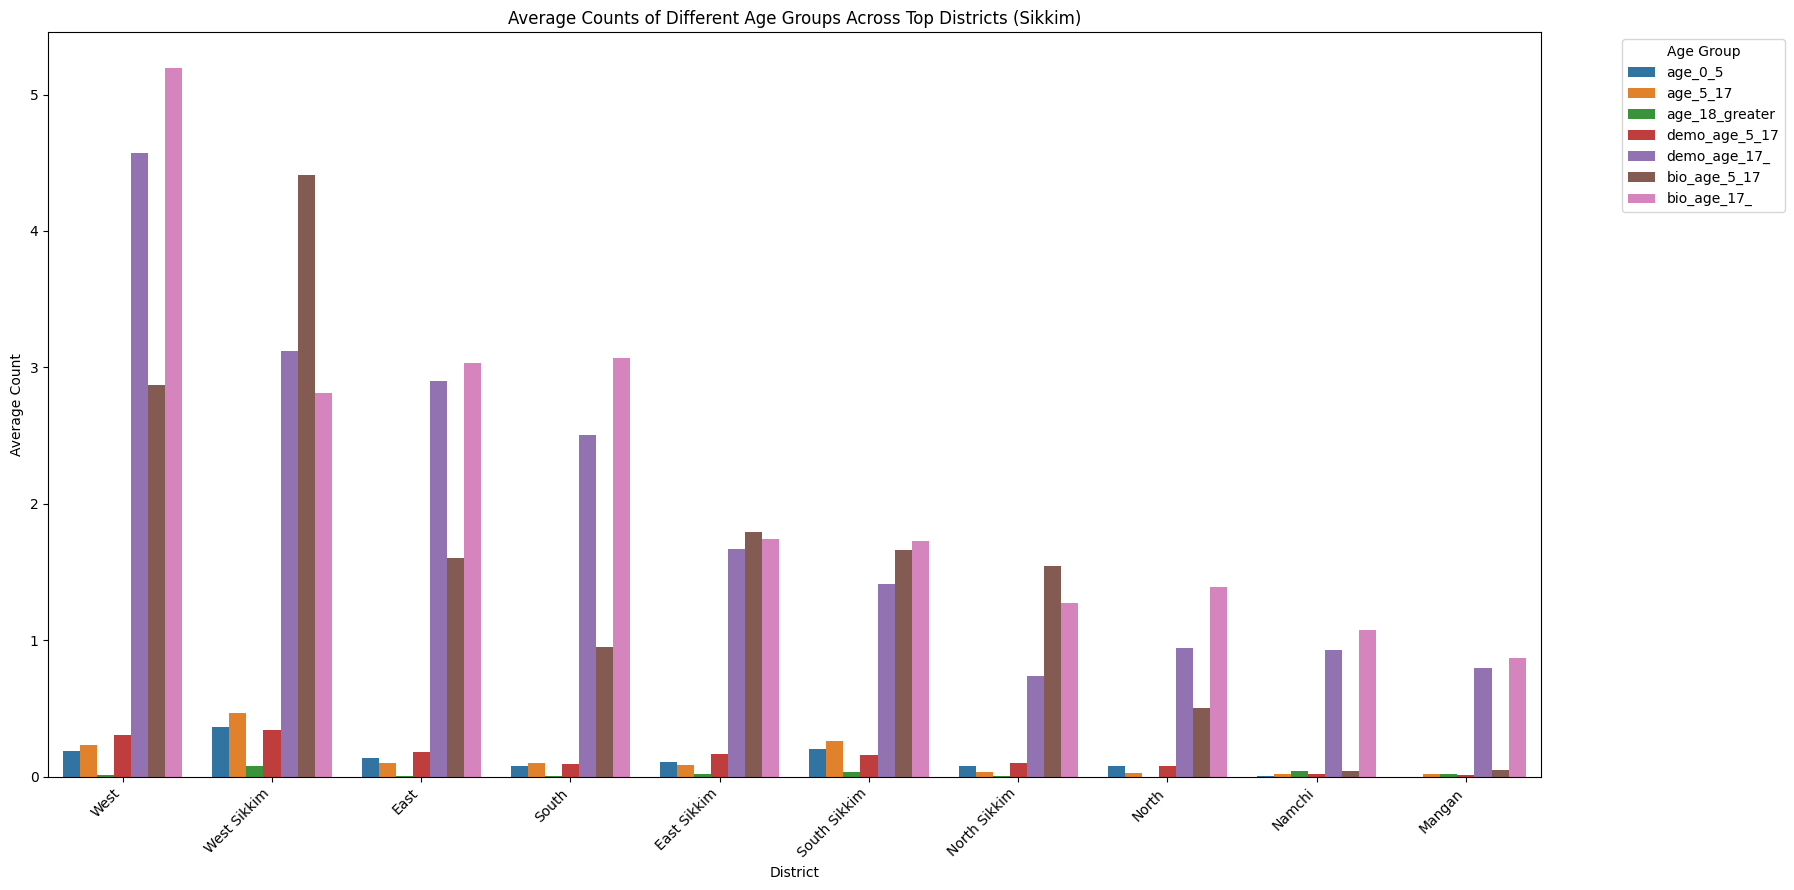

In [550]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_sk_district_mean = df_sk_merged.groupby('district')[age_cols_to_group].mean().reset_index()
df_sk_district_mean['total_avg_age'] = df_sk_district_mean[age_cols_to_group].sum(axis=1)
df_sk_district_mean_top10 = df_sk_district_mean.nlargest(10, 'total_avg_age')

df_sk_district_mean_melted = df_sk_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_sk_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top Districts (Sikkim)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Time-series aggregated data (sum of age-related columns per date) for Sikkim:
   year  month  age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  2025      3      0.0       0.0             0.0          339.0   
1  2025      4     67.0      88.0            21.0            0.0   
2  2025      5      0.0       0.0             0.0            0.0   
3  2025      6    120.0     171.0            21.0            0.0   
4  2025      7    148.0     255.0            28.0            0.0   

   demo_age_17_  bio_age_5_17  bio_age_17_       date  
0        4460.0        2524.0       2030.0 2025-03-01  
1           0.0        2428.0       2108.0 2025-04-01  
2           0.0        2167.0       2512.0 2025-05-01  
3           0.0        1446.0       3358.0 2025-06-01  
4           0.0         976.0       2410.0 2025-07-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          -

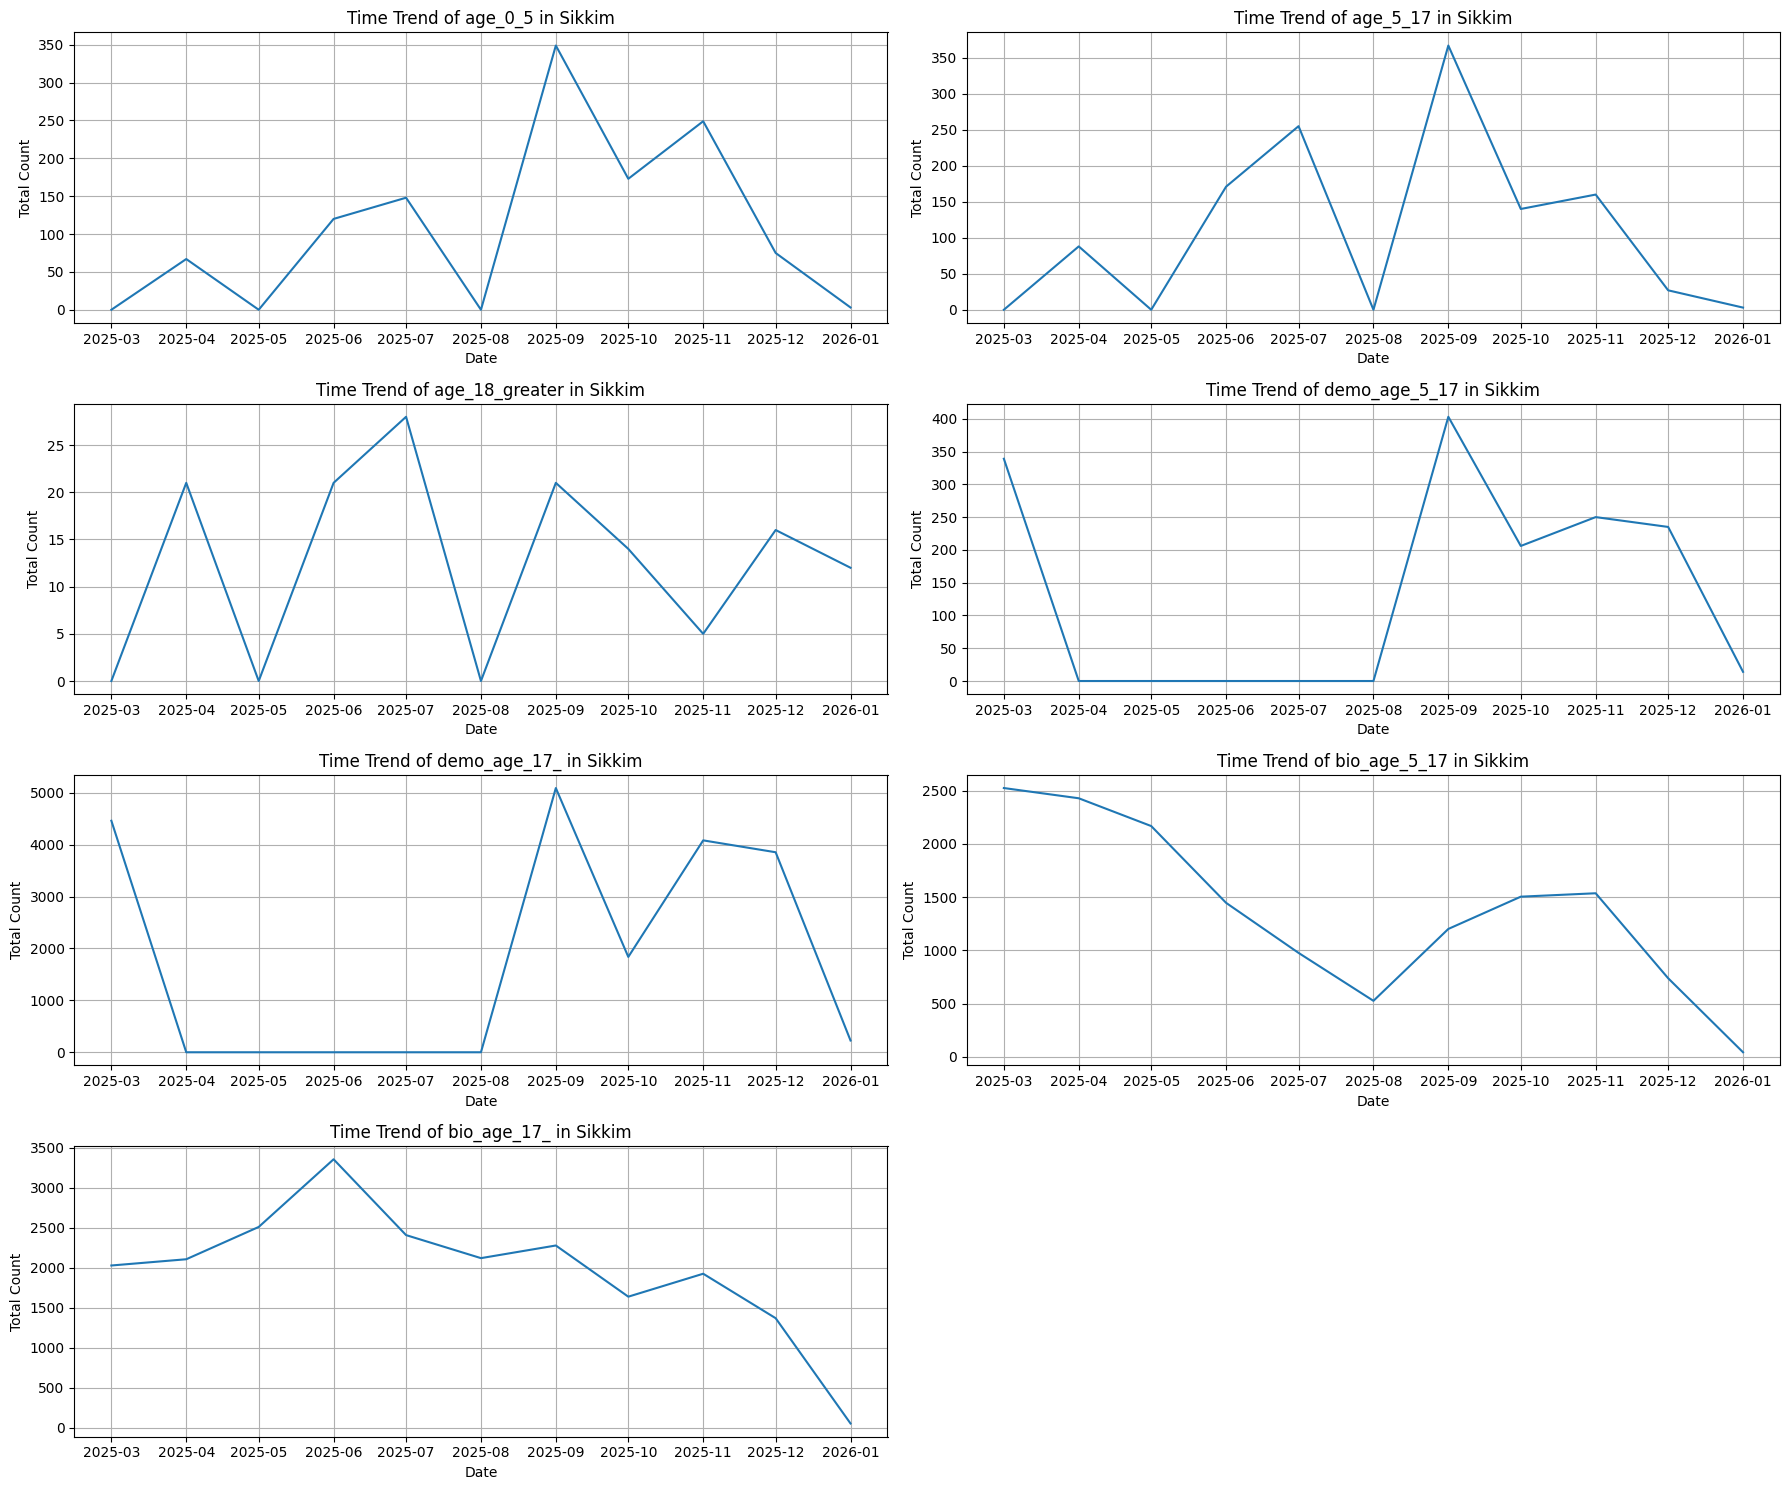

Insight: Line charts for each age-related column over time in Sikkim provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [551]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for time trend analysis
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by year and month and sum the age-related columns
df_sk_time_trend = df_sk_agg.groupby(['year', 'month'])[age_cols_to_group].sum().reset_index()

# Create a proper date column for plotting
df_sk_time_trend['date'] = pd.to_datetime(df_sk_time_trend['year'].astype(str) + '-' + df_sk_time_trend['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_sk_time_trend = df_sk_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Sikkim:")
print(df_sk_time_trend.head())
print(df_sk_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_sk_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Sikkim')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Sikkim provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

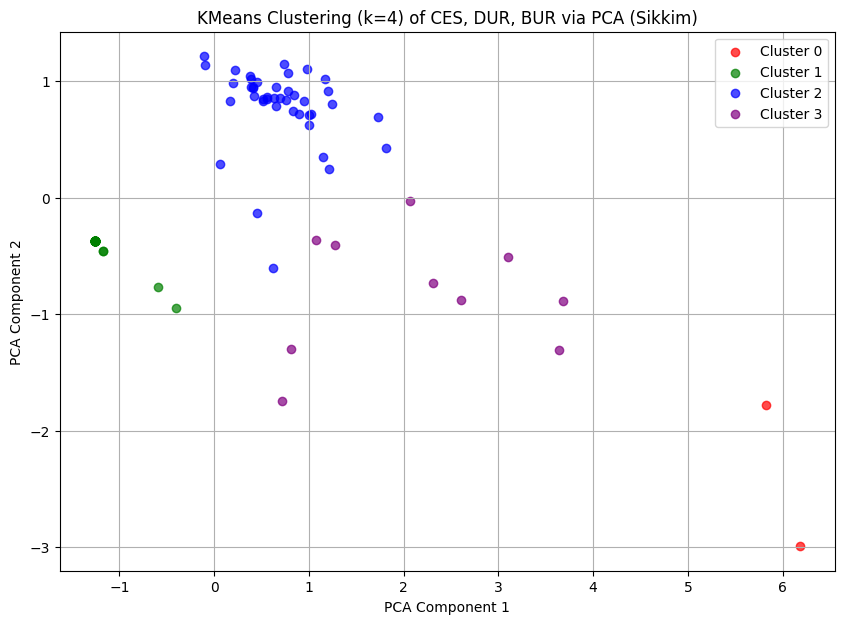

First 5 rows of df_sk_agg with 'clusterlabel' column:
   year  month   state      district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Sikkim          East      0.0       0.0             0.0   
1  2025      3  Sikkim   East Sikkim      0.0       0.0             0.0   
2  2025      3  Sikkim         North      0.0       0.0             0.0   
3  2025      3  Sikkim  North Sikkim      0.0       0.0             0.0   
4  2025      3  Sikkim         South      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0           67.0        1290.0         419.0  ...  0.793021  0.556545   
1           85.0         778.0         401.0  ...  0.499603  0.352366   
2            0.0           0.0          22.0  ...  0.038065  0.012688   
3            0.0           0.0          60.0  ...  0.073751  0.024584   
4           17.0         612.0         205.0  ...  0.501983  0.302771   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURris

In [552]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_sk_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_sk_agg
df_sk_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_sk_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Sikkim)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_sk_agg with 'clusterlabel' column:")
print(df_sk_agg.head())

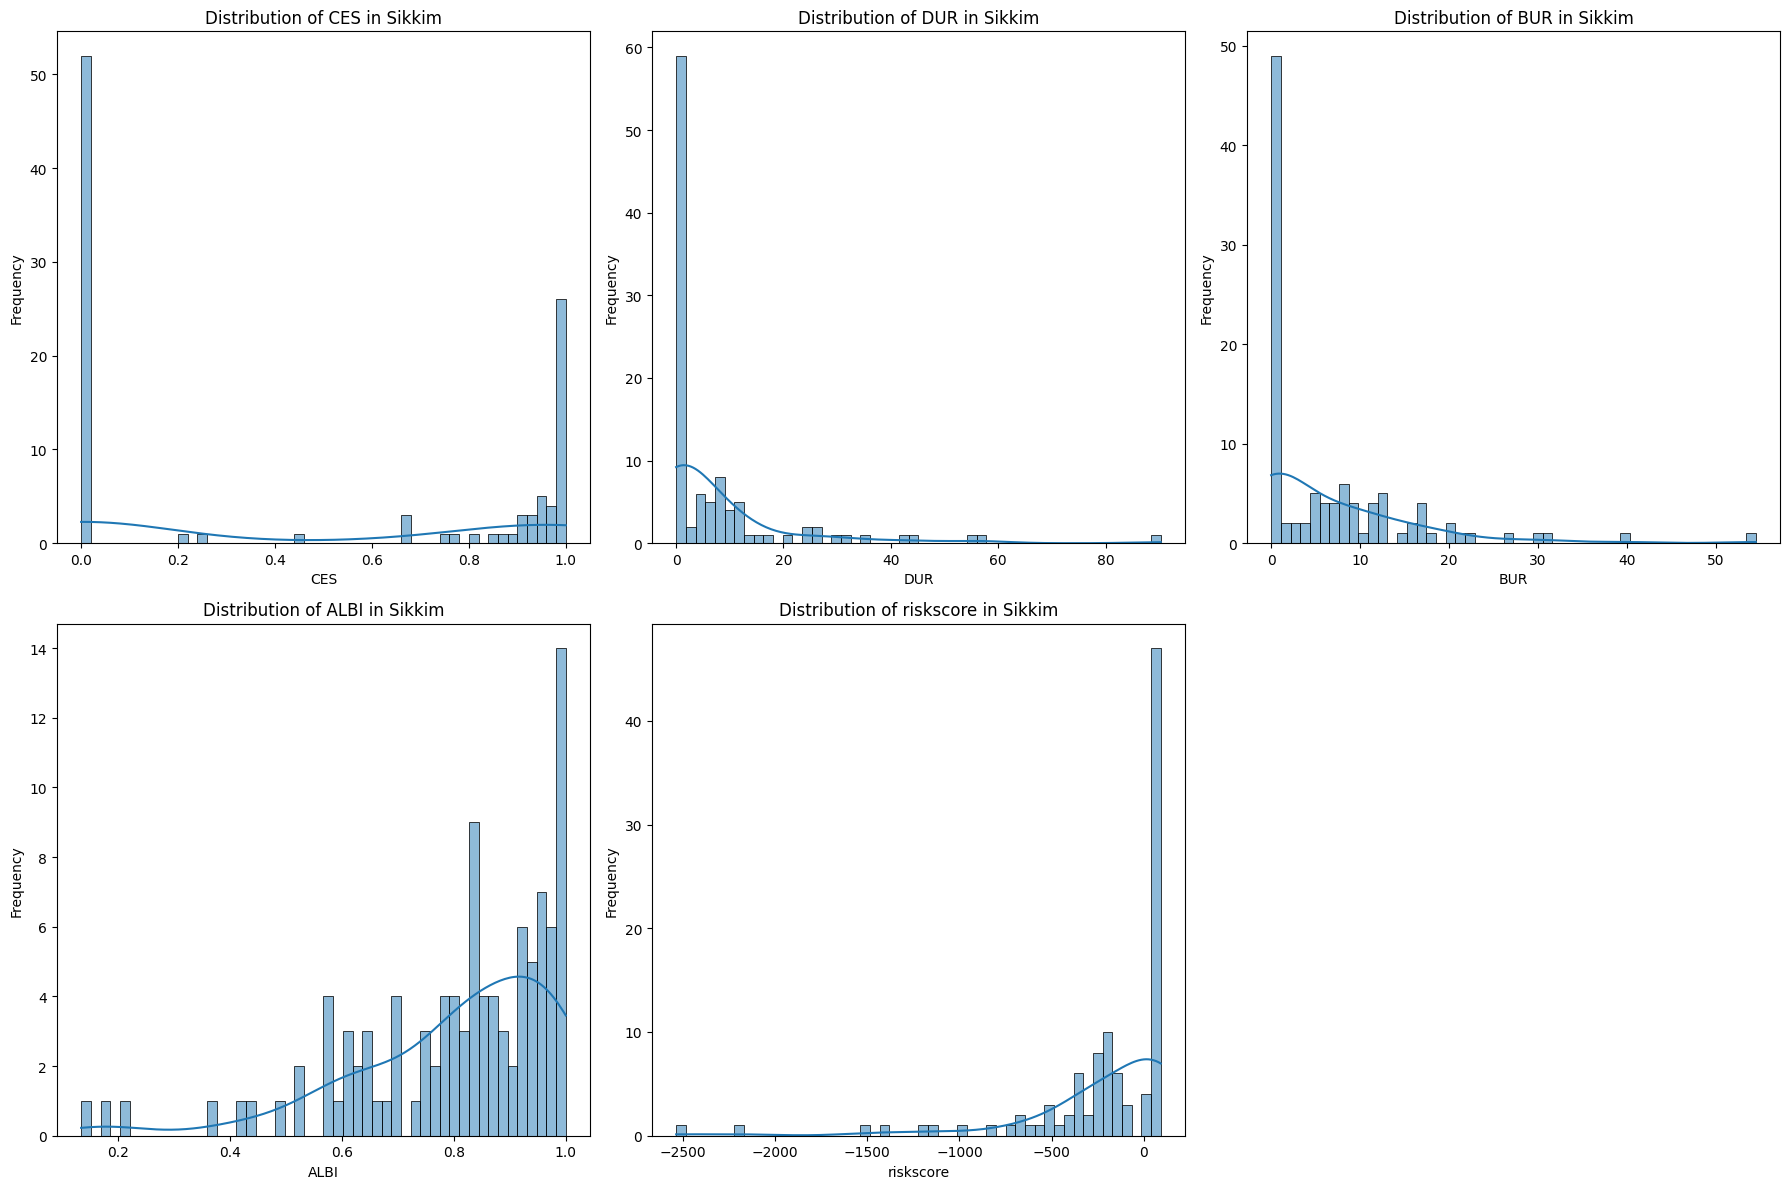

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Sikkim.


In [553]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_sk_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Sikkim')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Sikkim.")

In [554]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_sk_agg['year'].max()
latest_month = df_sk_agg[df_sk_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_sk_agg for the latest year and month
df_latest_month = df_sk_agg[(df_sk_agg['year'] == latest_year) & (df_sk_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
    district      CES
       South 1.000000
        East 0.666667
        West 0.666667
 East Sikkim 0.000000
      Mangan 0.000000
      Namchi 0.000000
North Sikkim 0.000000
       North 0.000000
South Sikkim 0.000000
 West Sikkim 0.000000

Bottom 10 Districts by CES (Year 2026, Month 1):
    district      CES
 East Sikkim 0.000000
      Mangan 0.000000
      Namchi 0.000000
       North 0.000000
South Sikkim 0.000000
North Sikkim 0.000000
 West Sikkim 0.000000
        East 0.666667
        West 0.666667
       South 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
    district       DUR
        East 23.666667
       South 21.000000
 West Sikkim 12.000000
        West 10.333333
 East Sikkim  7.800000
      Mangan  2.000000
      Namchi  2.000000
       North  0.000000
North Sikkim  0.000000
South Sikkim  0.000000

Bottom 10 Districts by DUR (Year

## Summary:

1.  **What are the key observations from the Aadhaar lifecycle analysis for Sikkim?**
    The analysis reveals significant disparities in demographic and biometric update rates and overall Aadhaar lifecycle balance across Sikkim's districts. While child enrolment scores (CES) are high for some districts (e.g., South at 1.0), others reported no child enrolments (e.g., East Sikkim, Mangan, Namchi, North, North Sikkim, West Sikkim at 0.0). Demographic Update Rates (DUR) and Biometric Update Rates (BUR) vary widely, with some districts like East (DUR: 23.67, BUR: 9.33) and South (DUR: 21.00, BUR: 6.50) showing high activity, while others (e.g., North, North Sikkim, South Sikkim) recorded 0.0 for both. The Aadhaar Lifecycle Balance Index (ALBI) indicates good balance in districts like North (0.995) and North Sikkim (0.957), but low balance in East (0.133) and East Sikkim (0.178). A recurring anomaly of significant negative risk scores was observed for several districts, such as East (-588.00) and South (-488.37), requiring further investigation into the metric's calculation.

2.  **Which districts showed anomalies in risk score or update rates?**
    *   **Risk Score Anomaly**: Districts like East (-588.00) and South (-488.37) exhibited large negative risk scores, indicating a potential issue with the metric's definition or calculation. Even for positive scores, South Sikkim (83.93) and North Sikkim (80.86) had the highest.
    *   **Update Rate Anomalies**: Districts such as East (DUR: 23.67, BUR: 9.33) and South (DUR: 21.00, BUR: 6.50) showed exceptionally high update rates. Conversely, North, North Sikkim, and South Sikkim consistently reported 0.0 for both DUR and BUR in the latest period. Some BUR values, particularly for South Sikkim (1.139) and North Sikkim (0.923) in a previous observation, exceeded 1, which might indicate re-updates or data reporting nuances that need clarification.

3.  **What insights or recommendations can be derived for further investigation or intervention?**
    Insights and recommendations include:
    *   The persistent issue of negative risk scores across multiple states, including Sikkim, strongly suggests that the risk score metric needs to be re-evaluated and refined to ensure accuracy, interpretability, and utility for actionable insights.
    *   Targeted interventions should focus on districts identified with low or zero update rates (DUR and BUR), such as North, North Sikkim, and South Sikkim, to understand underlying causes and improve Aadhaar data quality and lifecycle management.

### Data Analysis Key Findings
*   **Data Integration and Preprocessing**: Enrolment, demographic, and biometric datasets were successfully loaded, 'date' columns converted to datetime objects, and merged into a single DataFrame (`df_sk_merged`). Missing numerical values were imputed with 0.
*   **Key Metric Calculation**: Derived metrics including `totalenrolments`, `childenrolments`, `totaldemoupdates`, `totalbioupdates`, `CES`, `DUR`, and `BUR` were computed, with appropriate handling for division by zero.
*   **Normalization and Balance Index (ALBI)**: Min-max normalization was applied to key activity metrics to calculate `Enorm`, `Dnorm`, and `Bnorm`. These were combined to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which was clipped between 0 and 1.
*   **Risk Score Calculation**: A `riskscore` was calculated by averaging five risk-normalized components and scaling to a 0-100 range. However, several districts, such as East (-588.00) and South (-488.37), displayed significant negative risk scores, indicating an anomaly in the metric's formulation.
*   **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **Child Enrolment Score (CES)**: South district had a perfect CES of 1.0, while East Sikkim, Mangan, Namchi, North, North Sikkim, and West Sikkim reported 0.0.
    *   **Demographic Update Rate (DUR)**: East (23.67) and South (21.00) districts showed the highest DURs. North Sikkim, South Sikkim, and North districts recorded 0.0.
    *   **Biometric Update Rate (BUR)**: East (9.33) and South (6.50) districts had the highest BURs. Mangan, North Sikkim, North, Namchi, and South Sikkim recorded 0.0.
    *   **Aadhaar Lifecycle Balance Index (ALBI)**: North (0.995) and North Sikkim (0.957) exhibited the best balance, close to 1. East (0.133) and East Sikkim (0.178) had the lowest balance.
*   **Correlation Analysis**: Strong positive correlations were observed within enrolment age groups, and within demographic and biometric update categories respectively. Correlations between enrolment figures and update figures were generally weaker.
*   **Clustering Analysis**: KMeans clustering successfully grouped districts into 4 distinct clusters based on their CES, DUR, and BUR metrics, visualized after PCA dimensionality reduction.

### Insights or Next Steps
*   Immediately investigate and refine the `riskscore` calculation to resolve the issue of negative values and ensure the metric provides accurate and actionable insights for identifying problematic districts.
*   Conduct a deeper dive into districts with extremely high update rates (e.g., East and South for DUR/BUR) and those with zero update rates (e.g., North, North Sikkim, South Sikkim for DUR/BUR) to understand the underlying causes, such as data reporting issues, operational bottlenecks, or success stories that can be replicated.
